**Содержание**:

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/1B1tj5Xd3jDnVtAtz4UzJwQZeIgS-srsV?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1XvD-kuM5BIuBeyUw6-RNaolUlcIjMPXv?usp=sharing)

## Введение 

**Распознавание речи (speech-to-text, STT) - автоматический процесс преобразования речевого сигнала в цифровую информацию (например, текстовые данные).**

Когда мы используем такие голосовые помощники, как Алиса (Яндекс), Сири (Apple), Маруся (Mail.ru) или включаем свет в комнате, оснащенной голосовым управлением (система "Умный дом"), то мы косвенно сталкиваемся с распознаванием речи. 

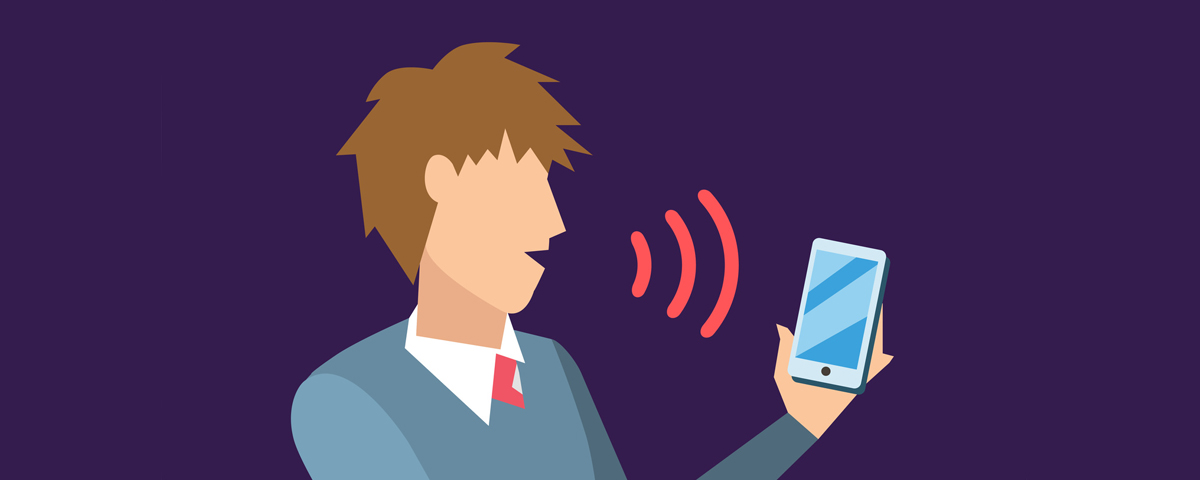

Системы распознавания речи начали разрабатывать в прошлом веке (ещё без использования нейронных сетей), но их мы рассматривать не будем, так как они уже не актуальны. Все современные системы распознавания голоса построены на основе ИИ. 

Задачу распознавания речи можно разделить на 2 основные категории:

*   Распознавание голосовых команд
*   Распознавание слитной речи

*В распознавании голосовых команд мы знаем, какие могут быть варианты, нужно определить, какой именно из вариантов был произнесен.* 

Задача сводится к классификации фрагментов аудиосигнала, ограниченного звуковыми паузами. Например, такая команда как "*Окей, гугл!*" распознается довольно хорошо, если её произносит человек любого возраста, пола или национальности (при условии, что фраза произносится более менее внятно). Но если сначала произнести "*Ок*" и только через несколько секунд "*гугл!*", то команда не будет распознана.



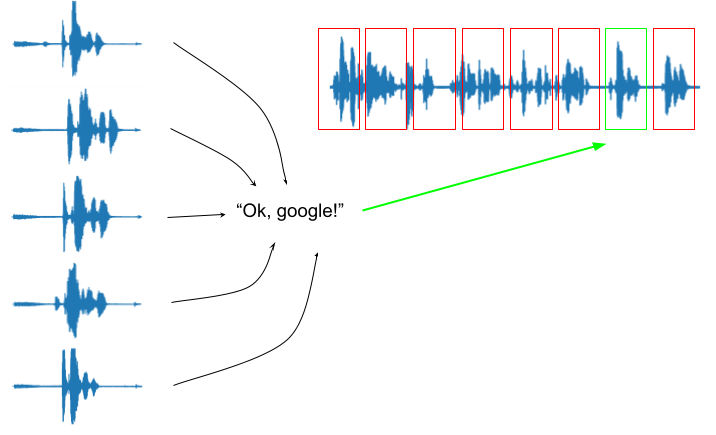

На картинке выше, изображены аудиосигналы фразы "Ok, google!" в нескольких вариантах (произнесенные разными людьми). Они немного отличаются, но в целом, визуально, похожи. Распознавание голосовой команды работает таким образом, что классификация происходит в потоке речи в режиме реального времени. Программа постоянно принимает аудиосигнал (слушает) и классифицирует фрагменты определенной длинны (например 0.5 секунды). Когда фрагмент распознан не как шум, а как класс "Ok, google!", то запускается соответствующий отклик и дальнейшие программы, типа поиска и т.д., в зависимости от запроса.

Области применения подобных систем:


*   Голосовой интерфейс управления системами
«Умный дом»
*   Активация голосовых помощников
*   Голосовой поиск/управление в мобильных устройствах
*   И т.д.

Для подобных задач обучающая выборка должна содержать сотни-тысячи примеров на каждый класс.

В практическом ноутбуке 2 мы построим систему распознавания голосовых команд умного дома.



*Распознавание слитной речи* является более сложной задачей, т.к. распознавание строится не на классификации фраз, а на основе распознавания букв или фонем (Фоне́ма — минимальная смыслоразличительная единица языка).
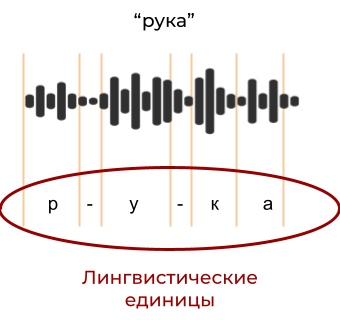

Общий подход к решению задачи такой:

аудиосигнал нарезается на очень маленькие фрагменты (10 миллисекунд -
минимальная длина фонемы) -> получаем спектрограмму каждого фрагмента ->
спектрограммы отправляются в нейронную сеть и классифицируются

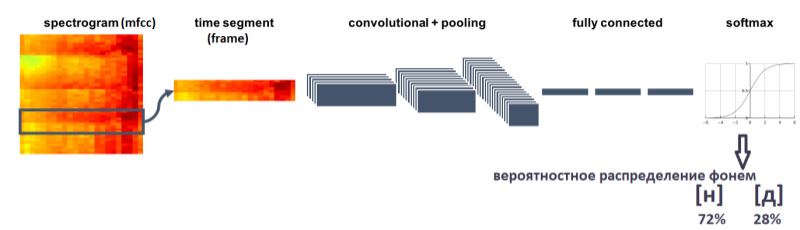

Для создания собственной подобной системы нужны не малые вычислительные мощности. Всё из-за того, что данных для обучения нужны сотни-тысячи **часов** записей (не примеров, а именно часов, что намного больше, чем датасет для задачи распознавания голосовых команд).

Поэтому в практическом ноутбуке 1 мы будем использовать уже готовые обученные системы для перевода аудио в текст.

Области применения систем распознавания слитной речи:


*   Телефония: автоматизация обработки входящих и исходящих звонков
*   Автоматическое стенографирование(замена секретаря/помощника)
*   Сервисы для людей с ограниченными возможностями
*   И т.д.


## Оценка качества распознавания речи

Самая популярная метрика качества в распознавании речи – WER (word error rate).

WER – это производная от величины называемой «расстояние Левенштейна», которая вычисляется на уровне слов, а не на уровне фонем. Расстояние Левенштейна – это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую.

WER можно понимать как примерный % НЕВЕРНЫХ слов:
*    WER 50% - каждое второе слово неверно
*    WER 20% - каждое пятое

Учитывайте также, что если STT модель проглотила предлог или поставила слово не в тот падеж, то в русском языке метрика WER получает штраф. Поэтому для русского WER выше, чем для английского при прочих равных.

Формула подсчета WER выглядит следующим образом:

    WER = (S + D + I)/N, где
    S – число операций замены слов
    D – число операций удаления слов
    I – число операций вставки слов
    N – общее количество слов

**Чем меньше WER, тем лучше. WER, подсчитанный для 2 одинаковых фраз, выдаст 0**

Приемлемым считается значение WER не более 0.15

## Проблемы в задаче распознавания речи

Существует ряд серьезных проблем, которые мешают идеальному распознаванию речи:

*    Широкая вариативность темпа речи
*    Одна и та же фраза, произнесенная одним человеком в разное время выдает различное звучание/разные спектрограммы
*    Одна и та же фраза, произнесенная разными людьми выдает еще более различное звучание/разные спектрограммы
*    Проблема кластеризации слитной речи: в непрерывном речевом потоке трудно распознать речевые единицы из-за неточного определения границ
*    Возможная зашумленность звука


## Стэк библиотек python для задачи STT

Список библиотек, в котором есть все необходимые инструменты для распознавания речи на python:

*    **SpeechRecognition** - библиотека, являющаяся оберткой над многими популярными сервисами/библиотеками распознавания речи
*    **LibROSA** – библиотека для анализа аудио информации
*    **Jiwer** – библиотека для оценки качества распознавания речи (метрика WER)
*    **PyAudio** – кроссплатформенная библиотека для форматирования и синтеза аудио


**Содержание**:

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/1B1tj5Xd3jDnVtAtz4UzJwQZeIgS-srsV?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1XvD-kuM5BIuBeyUw6-RNaolUlcIjMPXv?usp=sharing)